<h1 align=center>Capítulo 8: Classificação de texto com spaCy</h1>
<p align=center><img src=https://static.portugues.com.br/2021/01/tipos-textuais.jpg width=500></p>

Este capítulo é dedicado a uma tarefa muito básica e popular da NLP: classificação de texto. Você aprenderá primeiro como treinar o componente classificador de texto do spaCy, **TextCategorizer**. Para isso, você aprenderá a preparar dados e alimentar os dados no classificador; então continuaremos a treinar o classificador. Você também praticará suas novas habilidades do **TextCategorizer** em um conjunto de dados popular para análise de sentimentos.

Em seguida, você também fará a classificação de texto com a *API Keras do framework popular TensorFlow* junto com o *spaCy*. Você aprenderá os conceitos básicos de redes neurais, modelagem de dados sequenciais com LSTMs e como preparar texto para tarefas de aprendizado de máquina com o módulo de pré-processamento de texto do Keras. Você também aprenderá a projetar uma rede neural com **tf.keras**.

Em seguida, faremos um experimento de classificação de texto de ponta a ponta, desde a preparação dos dados até o pré-processamento do texto com o Keras Tokenizer, o projeto da rede neural, o treinamento do modelo e a interpretação dos resultados da classificação. Isso é um pacote completo de aprendizado de máquina! Neste capítulo, abordaremos os seguintes tópicos principais:
* Noções básicas de classificação de texto
* Treinamento do classificador de texto spaCy
* Análise de sentimentos com spaCy
* Classificação de texto com spaCy e Keras

## Entendendo os fundamentos da classificação de texto
A classificação de texto é a tarefa de atribuir um conjunto de rótulos predefinidos ao texto. Dado um conjunto de classes predefinidas e algum texto, você deseja entender em qual classe predefinida esse texto se enquadra. Temos que determinar as classes nós mesmos pela natureza de nossos dados antes de iniciar a tarefa de classificação. Por exemplo, uma avaliação do cliente pode ser positiva, negativa ou neutra.

Os classificadores de texto são usados para detectar e-mails de spam em sua caixa de correio, determinar o sentimento das avaliações do cliente, entender a intenção do cliente, classificar os tíquetes de reclamação do cliente e assim por diante.

A classificação de textos é uma tarefa fundamental da NLP. Está ganhando importância no mundo dos negócios, pois permite que as empresas automatizem seus processos. Um exemplo imediato são os filtros de spam. Todos os dias, os usuários recebem muitos e-mails de spam, mas na maioria das vezes nunca veem esses e-mails e não recebem nenhuma notificação porque os filtros de spam evitam que os usuários se preocupem com e-mails irrelevantes e gastem tempo excluindo esses e-mails.

Classificadores de texto podem vir em diferentes sabores. Alguns classificadores se concentram na emoção geral do texto, alguns classificadores se concentram na detecção do idioma do texto e alguns classificadores se concentram apenas em algumas palavras do texto, como verbos. A seguir estão alguns dos tipos mais comuns de classificação de texto e seus casos de uso:
* **Detecção de tópico**: A detecção de tópico é a tarefa de entender o tópico de um determinado texto. Por exemplo, o texto em um e-mail do cliente pode estar solicitando um reembolso, solicitando uma fatura anterior ou simplesmente reclamando do atendimento ao cliente.
* **Análise de sentimento**: A análise de sentimento é a tarefa de entender se o texto contém emoções positivas ou negativas sobre um determinado assunto. A análise de sentimentos é usada frequentemente para analisar as avaliações dos clientes sobre produtos e serviços.
* **Detecção de idioma**: A detecção de idioma é o primeiro passo de muitos sistemas de NLP, como a tradução automática.

A figura a seguir mostra um classificador de texto para um sistema de automação de atendimento ao cliente:

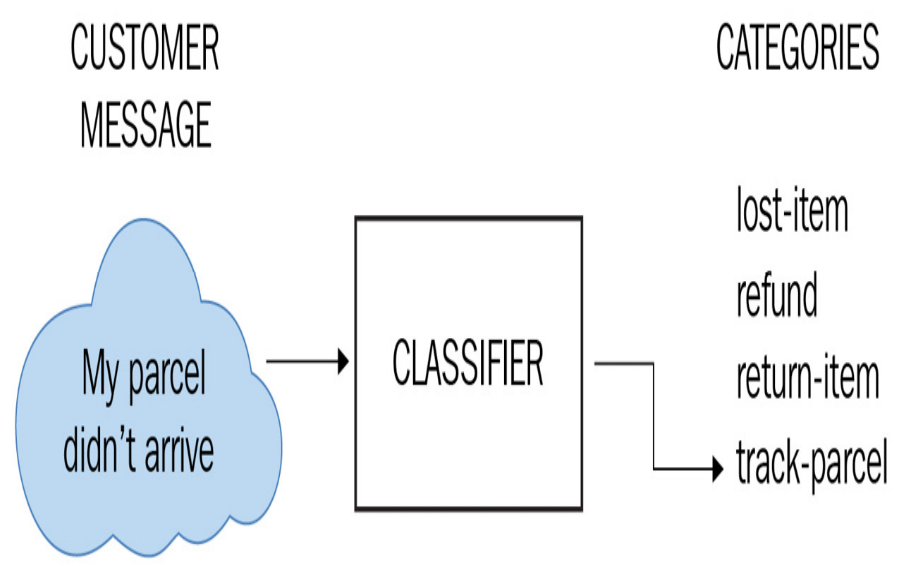

In [250]:
from IPython.display import Image
Image("images/detection_text.PNG")

Chegando aos detalhes técnicos, a classificação de texto é uma tarefa de aprendizado de máquina *supervisionada*. Isso significa que o classificador pode prever o rótulo de classe de um texto com base em pares de rótulo de classe de texto de entrada de *exemplo*. Portanto, para treinar um classificador de texto, precisamos de um conjunto de *dados rotulado*. Um conjunto de dados rotulado é basicamente uma lista de pares de rótulo de texto. Aqui está um conjunto de dados de exemplo de cinco frases de treinamento com seus rótulos:
~~~python
This shampoo is great for hair. POSITIVE
I loved this shampoo, best product ever! POSITIVE
My hair has never been better, great product. POSITIVE
This product make my scalp itchy. NEGATIVE
Not the best quality for this price. NEGATIVE
~~~
Em seguida, treinamos o classificador mostrando o texto e os rótulos de classe correspondentes ao classificador. Quando o classificador vê um novo texto que não estava no texto de treinamento, ele prevê o rótulo da classe desse texto não visto com base nos exemplos que viu durante a fase de treinamento. A saída de um classificador de texto é sempre um rótulo de classe.

A classificação de texto também pode ser dividida em três categorias, dependendo do número de classes usadas:
* **A classificação de texto binário** significa que queremos categorizar nosso texto em duas classes.
* **A classificação de texto multiclasse** significa que existem mais de duas classes. Cada classe é mutuamente exclusiva – um texto pode pertencer apenas a uma classe. De forma equivalente, uma instância de treinamento pode ser rotulada com apenas um rótulo de classe. Um exemplo é avaliar as avaliações dos clientes. Uma avaliação pode ter 1, 2, 3, 4 ou 5 estrelas (cada categoria de estrela é uma classe).
* **A classificação de texto multirótulo** é uma generalização da classificação multiclasse, onde vários rótulos podem ser atribuídos a cada texto de exemplo. Por exemplo, a classificação de mensagens de mídia social tóxicas é feita com vários rótulos. Desta forma, nosso modelo pode distinguir diferentes níveis de toxicidade. Os rótulos de classe são tipicamente tóxicos, tóxicos severos, insultos, ameaças, obscenidades. Uma mensagem pode incluir insultos e ameaças, ou ser classificada como insulto, toxicidade, obscenidade e assim por diante. Portanto, para esse problema, usar várias classes é mais adequado.

Rótulos são os nomes das classes que queremos ver como saída. Um rótulo de classe pode ser categórico (*string*) ou numérico (um número). Aqui estão alguns rótulos de classe comumente usados:
* Para análise de sentimento, geralmente usamos os rótulos de classe positivos e negativos. Suas abreviaturas, *pos* e *neg*, também são comumente usadas. Os rótulos de classe binária também são populares – 0 significa sentimento negativo e 1 significa sentimento positivo.
* O mesmo se aplica a problemas de classificação binária. Geralmente usamos 0-1 para rótulos de classe.
* Para problemas multiclasse e multirótulo, geralmente nomeamos as classes com um nome significativo. Para um classificador de gênero de filme, podemos usar os rótulos família, internacional, domingo à noite, Disney, ação e assim por diante. Os números também são usados como rótulos. Para um problema de classificação de cinco classes, podemos usar os rótulos 1, 2, 3, 4 e 5.

Agora que cobrimos os conceitos básicos de classificação de texto, vamos codificar! Na próxima seção, exploraremos como treinar o componente classificador de texto do spaCy.

**Treinando o classificador de texto spaCy**
Nesta seção, aprenderemos sobre os detalhes do componente classificador de texto do spaCy **TextCategorizer**. No Capítulo 2, Operações principais com spaCy, vimos que o pipeline spaCy NLP consiste em componentes. No Capítulo 3, Recursos linguísticos, aprendemos sobre os componentes essenciais do pipeline spaCy NLP, que são o tokenizer de sentença, o tagger POS, o analisador de dependência e o **reconhecimento de entidade nomeada (NER)**.

**TextCategorizer** é um componente de pipeline opcional e treinável. Para treiná-lo, precisamos fornecer exemplos e seus rótulos de classe. Primeiro adicionamos **TextCategorizer** ao pipeline de NLP e, em seguida, fazemos o procedimento de treinamento. A Figura 8.2 mostra onde exatamente o componente **TextCategorizer** está no pipeline de NLP; este componente vem depois dos componentes essenciais. No diagrama a seguir, **textcat** se refere ao componente **TextCategorizer**.

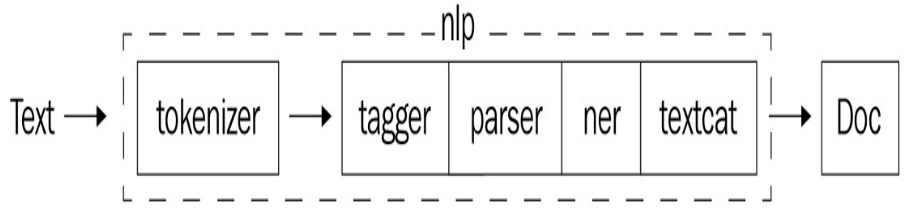

In [251]:
Image("images/textcategorizer.PNG")

Uma arquitetura de rede neural está por trás do **TextCategorizer** da spaCy. **TextCategorizer** nos fornece abordagens amigáveis e de ponta a ponta para treinar o classificador, para que não tenhamos que lidar diretamente com a arquitetura da rede neural. Vamos projetar nossa própria arquitetura de rede neural na próxima classificação de texto com a *seção spaCy e Keras*. Depois de analisar a arquitetura, estamos prontos para mergulhar no código do **TextCategorizer**. Vamos conhecer a classe **TextCategorizer** primeiro.

### Conhecendo a classe TextCategorizer
Agora vamos conhecer em detalhes a classe **TextCategorizer**. Em primeiro lugar, importamos **TextCategorizer** dos componentes do pipeline:

In [252]:
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

**TextCategorizer** está disponível em dois tipos, classificador de rótulo único e classificador multirótulo. Como observamos na seção anterior, um classificador multirrótulo pode prever mais de uma classe. Um classificador de rótulo único prevê apenas uma classe para cada exemplo e as classes são mutuamente exclusivas. A linha de importação anterior importa o classificador de rótulo único e o código a seguir importa o classificador de rótulos múltiplos:

In [253]:
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL

Em seguida, precisamos fornecer uma configuração para o componente **TextCategorizer**. Fornecemos dois parâmetros aqui, um valor de limite e um nome de modelo (**Single** ou **Multi**, dependendo da tarefa de classificação). **TextCategorizer** gera internamente uma probabilidade para cada classe e uma classe é atribuída ao texto se a probabilidade dessa classe for maior que o valor limite. Um valor de limite tradicional para classificação de texto é **0.5**, no entanto, se você quiser fazer uma previsão com maior confiança, poderá aumentar o limite, como **0.6, 0.7 ou 0.8**.

Resumindo, podemos adicionar um componente **TextCategorizer** de rótulo único ao pipeline **nlp** da seguinte maneira:

In [254]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL
config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL
}
textcat = nlp.add_pipe("textcat", config=config)
textcat

Adicionar um componente multilabel ao pipeline **nlp** é semelhante:

In [255]:
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL
config = {
    "threshold": 0.5,
    "model": DEFAULT_MULTI_TEXTCAT_MODEL
}
textcat = nlp.add_pipe("textcat_multilabel", config=config)
textcat

Na última linha de cada um dos blocos de código anteriores, adicionamos um componente de pipeline **TextCategorizer** ao objeto de pipeline **nlp**. O componente **TextCategorizer** recém-criado é capturado pela variável **textcat**. Estamos prontos para treinar o componente **TextCategorizer** agora. O código de treinamento é bastante semelhante ao código de treinamento do componente NER do Capítulo 7, Personalizando modelos spaCy, exceto por alguns detalhes menores.

### Formatando dados de treinamento para o TextCategorizer

Vamos iniciar nosso código preparando um pequeno conjunto de treinamento. Vamos preparar um conjunto de dados de sentimento do cliente para classificação de texto binário. O rótulo será chamado de **sentimento** e pode obter dois valores possíveis, 0 e 1 correspondentes ao sentimento negativo e positivo. O conjunto de treinamento a seguir contém 6 exemplos, sendo 3 positivos e 3 negativos:

In [256]:
train_data = [
    ("I loved this product, very easy to use.", {"cats":{"sentiment": 1}}),
    ("I'll definitely purchase again. I recommend this product.",{"cats": {"sentiment": 1}}),
    ("This is the best product ever. I loved the scent and the feel. Will buy again.", {"cats": {"sentiment": 1}}),
	("Disappointed. This product didn't work for me at all", {"cats": {"sentiment": 0}}),
	("I hated the scent. Won't buy again", {"cats": {"sentiment":0}}),
	("Truly horrible product. Very few amount of product for a high price. Don't recommend.", {"cats": {"sentiment": 0}})
]

Cada exemplo de treinamento é uma tupla de um texto e um dicionário aninhado. O dicionário contém o rótulo da classe em um formato que o spaCy reconhece. O campo **cats** significa as categorias. Em seguida, incluímos o sentimento do rótulo da classe e seu valor. O valor deve ser sempre um número de ponto flutuante. No código, apresentaremos o rótulo de classe que escolhemos para o componente **TextCategorizer**. Vamos ver o código completo. Primeiro, fazemos as importações necessárias:

In [257]:
import random
import spacy
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

Importamos a biblioteca interna **random** para embaralhar nosso conjunto de dados. Importamos o **spacy** como de costume, e importamos **Example** para preparar os exemplos de treinamento no formato spaCy. Na última linha do bloco de código, importamos um modelo de categorizador de texto.

Em seguida, faremos a inicialização do pipeline e do componente **TextCategorizer**:

In [258]:
nlp = spacy.load("en_core_web_md")
config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL
}
textcat = nlp.add_pipe("textcat", config=config)

Agora, vamos trabalhar no componente **TextCategorizer** recém-criado, **textcat**. Apresentaremos nosso **sentiment** de rótulo ao componente **TextCategorizer** chamando **add_label**. Então, precisamos inicializar este componente com nossos exemplos. Essa etapa é diferente do que fizemos no código de treinamento do NER no Capítulo 7, Personalizando modelos spaCy.

A razão é que o NER é um componente essencial, portanto, é sempre inicializado pelo pipeline. **TextCategorizer** é um componente opcional e vem como um modelo estatístico em branco. O código a seguir adiciona nosso rótulo ao componente **TextCategorizer** e inicializa os pesos do modelo **TextCategorizer** com os exemplos de treinamento:

In [259]:
train_examples = []
for text, cat in train_data:
    rating = cat['cats']['sentiment']
    label = {"POS": True, "NEG": False} if rating == 1 else {"NEG": True, "POS": False}
    train_examples.append(Example.from_dict(nlp.make_doc(text), {"cats": label}))

textcat.add_label("POS")
textcat.add_label("NEG")
textcat.initialize(lambda: train_examples, nlp=nlp)

In [260]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'textcat']


Observe que alimentamos os exemplos para **textcat.initialize** como objetos **Example**. Lembre-se do Capítulo 7, Personalizando modelos spaCy, que os métodos de treinamento spaCy sempre funcionam com objetos **Example**.

### Definindo o loop de treinamento
Estamos prontos para definir o loop de treinamento. Em primeiro lugar, desabilitaremos outros componentes do pipe para que apenas o **textcat** seja treinado. Segundo, vamos criar um objeto otimizador chamando **resume_training**, mantendo os pesos dos modelos estatísticos existentes. Para cada época, revisamos os exemplos de treinamento um por um e atualizamos os pesos do **textcat**. Examinamos os dados de 20 épocas. O código a seguir define o loop de treinamento:

In [261]:
epochs=20
with nlp.select_pipes(enable="textcat"):
	optimizer = nlp.resume_training()
	for i in range(epochs):
		random.shuffle(train_data)
		for text, label in train_data:
			doc = nlp.make_doc(text)
			example = Example.from_dict(doc, label)
			nlp.update([example], sgd=optimizer)

É isso! Com este segmento de código relativamente curto, treinamos um classificador de texto! Aqui está a saída na minha máquina (seus valores de perda podem ser diferentes):

### Testando o novo componente
Vamos testar o novo componente categorizador de texto. A propriedade **doc.cats** contém os rótulos de classe:

In [262]:
doc2 = nlp("This product sucks")
doc2.cats

{'POS': 0.5, 'NEG': 0.5}

In [263]:
doc3 = nlp("This product is great")
doc3.cats

{'POS': 0.5, 'NEG': 0.5}

Excelente! Nosso pequeno conjunto de dados treinou com sucesso o classificador de texto spaCy para um problema de classificação de texto binário, na verdade uma tarefa de análise de sentimentos. Agora, veremos como fazer a classificação multilabel com o **TextCategorizer** do spaCy.

### Treinamento TextCategorizer para classificação multilabel
Lembre-se da primeira seção que a classificação multirrótulo significa que o classificador pode prever mais de um rótulo para um texto de exemplo. Naturalmente, as classes não são mutuamente exclusivas. Para treinar um classificador multilabel, precisamos fornecer um conjunto de dados que contenha exemplos que tenham mais de um rótulo.

Para treinar o **TextCategorizer** do spaCy para classificação multirrótulo, começaremos novamente construindo um pequeno conjunto de treinamento. Desta vez, formaremos um conjunto de resenhas de filmes, onde os rótulos são **FAMILY, THRILLER e SUNDAY_EVENING**. Aqui está nosso pequeno conjunto de dados:

In [264]:
train_data = [
	("It's the perfect movie for a Sunday evening.", {"cats": {"SUNDAY_EVENING": True}}),
	("Very good thriller", {"cats": {"THRILLER": True}}),
	("A great movie for the kids and all the family" , {"cats": {"FAMILY": True}}),
	("An ideal movie for Sunday night with all the family. My kids loved the movie.", {"cats": {"FAMILY": True, "SUNDAY_EVENING":True}}),
	("A perfect thriller for all the family. No violence, no drugs, pure action.", {"cats": {"FAMILY": True, "THRILLER": True}})
]

Fornecemos alguns exemplos com um rótulo, como o primeiro exemplo (a primeira frase de **train_data**, a segunda linha do bloco de código anterior) e também fornecemos exemplos com mais de um rótulo, como o quarto exemplo do **train_data**.

Faremos as importações depois de formarmos o conjunto de treinamento:

In [265]:
import random
import spacy
from spacy.training import Example
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL

Aqui, a última linha é diferente do código da seção anterior. Importamos o modelo multirótulo em vez do modelo de rótulo único.

Em seguida, adicionamos o componente classificador multilabel ao pipeline nlp. Novamente, preste atenção ao nome do componente do pipeline – desta vez, é **textcat_multilabel**, comparado ao textcat da seção anterior:

In [266]:
config = {
    "threshold": 0.5,
    "model": DEFAULT_MULTI_TEXTCAT_MODEL
}
textcat = nlp.add_pipe("textcat_multilabel", config=config)

Adicionar os rótulos ao componente **TextCategorizer** e inicializar o modelo é semelhante à seção Treinando o classificador de texto spaCy. Desta vez, adicionaremos três rótulos em vez de um:

In [267]:
labels = ["FAMILY", "THRILLER", "SUNDAY_EVENING"]
for label in labels:
    textcat.add_label(label)
train_examples = [Example.from_dict(nlp.make_doc(text), label) for text,label in train_data]
textcat.initialize(lambda: train_examples, nlp=nlp)

Estamos prontos para definir o loop de treinamento. As funções de código são semelhantes ao código da seção anterior. A única diferença é o nome do componente na primeira linha. Agora é **textcat_multilabel**:

In [268]:
epochs=20
with nlp.select_pipes(enable="textcat_multilabel"):
	optimizer = nlp.resume_training()
	for i in range(epochs):
		random.shuffle(train_data)
		for text, label in train_data:
			doc = nlp.make_doc(text)
			example = Example.from_dict(doc, label)
			nlp.update([example], sgd=optimizer)

A saída deve ser semelhante à saída da seção anterior, um valor de perda por época. Agora, vamos testar nosso novo classificador multilabel:

In [269]:
doc2 = nlp("Definitely in my Sunday movie night list")
doc2.cats

{'POS': 0.5,
 'NEG': 0.5,
 'FAMILY': 0.9601591229438782,
 'THRILLER': 0.36125120520591736,
 'SUNDAY_EVENING': 0.9963576197624207}

Observe que cada rótulo admitiu uma probabilidade positiva na saída. Além disso, as probabilidades não somam 1, porque não são mutuamente exclusivas. Para este exemplo, as probabilidades do rótulo **SUNDAY_EVENING** e **THRILLER** são previstas corretamente, mas a probabilidade do rótulo **FAMILY** não parece ideal. Isso se deve principalmente ao fato de que não fornecemos exemplos suficientes. Normalmente, para problemas de classificação multirrótulo, o classificador precisa de mais exemplos do que a classificação binária, pois o classificador precisa aprender mais rótulos.

Aprendemos como treinar o componente **TextCategorizer** do spaCy para classificação de texto binário e classificação de texto com vários rótulos. Agora, vamos treinar **TextCategorizer** em um conjunto de dados do mundo real para um problema de análise de sentimentos.

### Análise de sentimentos com spaCy
Nesta seção, trabalharemos em um conjunto de dados do mundo real e treinaremos o **TextCategorizer** da spaCy nesse conjunto de dados. Trabalharemos no conjunto de dados Amazon Fine Food Reviews (https://www.kaggle.com/snap/amazon-fine-food- reviews) do Kaggle neste capítulo. O conjunto de dados original é enorme, com 100.000 linhas. Amostramos 4.000 linhas. Este conjunto de dados contém avaliações de clientes sobre alimentos finos vendidos na Amazon. As avaliações incluem informações do usuário e do produto, classificação do usuário e texto.

Você pode baixar o conjunto de dados do repositório GitHub do livro. Digite o seguinte comando no seu terminal:

`wget https://github.com/PacktPublishing/Mastering-spaCy/blob/main/Chapter08/data/Reviews.zip`

Como alternativa, você pode clicar na URL no comando anterior e o download será iniciado. Você pode descompactar o arquivo zip com o seguinte:

`unzip Reviews.zip`

Como alternativa, você pode clicar com o botão direito do mouse no arquivo ZIP e escolher Extrair aqui para inflar o arquivo ZIP.

### Explorando o conjunto de dados
Agora, estamos prontos para explorar o conjunto de dados. Nesta seção, usaremos um *notebook Jupyter*. Se você já tiver o *Jupyter* instalado, poderá executar as células do notebook diretamente. Se você não tiver o Jupyter Notebook em seu sistema, siga as instruções no site do Jupyter (https://jupyter.org/install).

Vamos fazer nossa exploração do conjunto de dados passo a passo:
1. Primeiro, faremos as importações para leitura e visualização do conjunto de dados:

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. Vamos ler o arquivo CSV em um DataFrame pandas e produzir a forma do DataFrame:

In [271]:
reviews_df=pd.read_csv('Reviews.csv')
reviews_df.shape

(3999, 10)

3. Em seguida, examinamos as linhas e as colunas do conjunto de dados imprimindo as primeiras 10 linhas:

In [272]:
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,50057,B000ER5DFQ,A1ESDLEDR9Y0JX,A. Spencer,1,2,1,1310256000,the garbanzo beans in it give horrible gas,To be fair only one of my twins got gas from t...
1,366917,B001AIQP8M,A324KM3YY1DWQG,danitrice,0,0,5,1251072000,Yummy Lil' Treasures!!,Just recieved our first order of these (they d...
2,214380,B001E5E1XW,A3QCWO53N69HW3,"M. A. Vaughan ""-_-GOBNOGO-_-""",2,2,5,1276473600,Great Chai,This is a fantastic Chai Masala. I am very pic...
3,178476,B000TIZP5I,AYZ5NG9705AG1,Consumer,0,0,5,1341360000,Celtic Salt worth extra price,Flavorful and has added nutrition! You use le...
4,542504,B000E18CVE,A2LMWCJUF5HZ4Z,"Miki Lam ""mikilam""",8,11,3,1222732800,mixed feelings,I thought this soup tasted good. I liked the t...


4. Usaremos as colunas **Text** e **Score**; portanto, descartaremos as outras colunas que não usaremos. Também chamaremos o método **dropna()** para descartar as linhas com valores ausentes:

In [273]:
reviews_df = reviews_df[['Text','Score']].dropna()

5. Podemos dar uma olhada rápida em como as pontuações das avaliações são distribuídas:

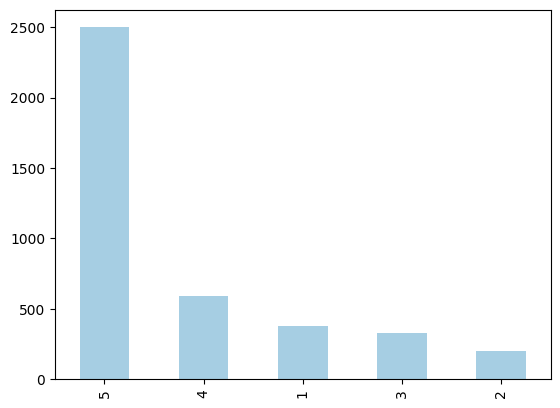

In [274]:
ax=reviews_df.Score.value_counts().plot(kind='bar',colormap='Paired')
plt.show()

6. Este trecho de código chama o método **plot** do dataframe **reviews_df** e exibe um gráfico de barras acima.

O número de classificações de 5 estrelas é bastante alto; parece que os clientes estão satisfeitos com a comida que compraram. No entanto, pode criar um desequilíbrio nos dados de treinamento se uma classe tiver um peso significativamente maior do que as outras.

**Desequilíbrio de classe** cria problemas para algoritmos de classificação em geral. Por exemplo, considera-se desequilíbrio quando uma turma tem significativamente mais exemplos de treinamento do que as outras turmas (geralmente uma proporção de 1:5 entre os exemplos). Existem diferentes maneiras de lidar com o desequilíbrio, uma delas é **up-sampling/down-sampling**. Em down-sampling, removemos aleatoriamente exemplos de treinamento da classe majoritária. No up-sampling, replicamos aleatoriamente o exemplo de treinamento da classe minoritária. Ambos os métodos visam equilibrar o número de exemplos de treinamento de classes majoritárias e minoritárias.

Aqui vamos aplicar outro método. Combinaremos avaliações de 1,2,3 estrelas e avaliações de 4,5 estrelas para obter um conjunto de dados mais equilibrado.

7. Para evitar isso, trataremos as avaliações de 1, 2 e 3 estrelas como negativas e as avaliações com mais de 4 estrelas como positivas. O segmento de código a seguir atribui um rótulo negativo a todos os comentários com classificação inferior a 4 estrelas e um rótulo positivo a todos os comentários com classificação superior a 4 estrelas:

In [275]:
reviews_df.Score[reviews_df.Score<=3]=0
reviews_df.Score[reviews_df.Score>=4]=1

C:\Users\willi\AppData\Local\Temp\ipykernel_19924\496420162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.Score[reviews_df.Score<=3]=0
C:\Users\willi\AppData\Local\Temp\ipykernel_19924\496420162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.Score[reviews_df.Score>=4]=1


8. Vamos traçar novamente a distribuição das classificações:

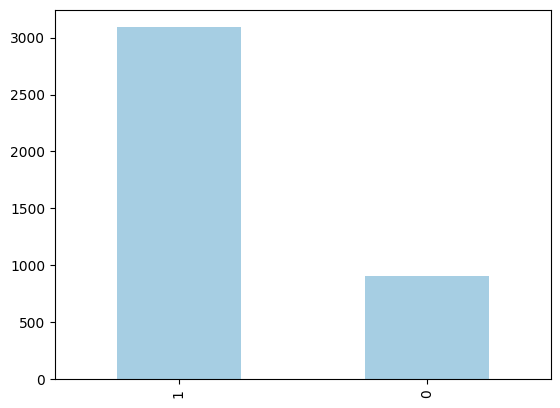

In [276]:
ax=reviews_df.Score.value_counts().plot(kind='bar',colormap='Paired')
plt.show()

A distribuição de classificação resultante parece muito melhor do que a Figura 8.5. Ainda assim, o número de críticas positivas é maior, mas o número de críticas negativas também é significativo, como pode ser observado no gráfico acima.

Depois de processar o conjunto de dados, reduzimos para um conjunto de dados de duas colunas com classificações negativas e positivas. Chamamos **reviews_df.head()** mais uma vez e o seguinte é o resultado que obtemos:

In [277]:
reviews_df.head()

,Text,Score
0,To be fair only one of my twins got gas from t...,0
1,Just recieved our first order of these (they d...,1
2,This is a fantastic Chai Masala. I am very pic...,1
3,Flavorful and has added nutrition! You use le...,1
4,I thought this soup tasted good. I liked the t...,0


Terminaremos nossa exploração do conjunto de dados aqui. Vimos a distribuição das pontuações das avaliações e os rótulos das turmas. O conjunto de dados agora está pronto para ser processado. Eliminamos as colunas não utilizadas e convertemos as pontuações das revisões em rótulos de classe binária. Vamos em frente e iniciar o procedimento de treinamento!

### Treinando o componente TextClassifier

Agora, estamos prontos para iniciar o procedimento de treinamento. Vamos treinar um classificador de texto binário com o classificador multilabel desta vez. Mais uma vez, vamos passo a passo:
1. Começamos importando as classes spaCy da seguinte forma:

In [278]:
import spacy
import random
from spacy.training import Example
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL

2. Em seguida, criaremos um objeto **pipeline**, nlp, definiremos a configuração do classificador e adicionaremos o componente **TextCategorizer** ao **nlp** com a seguinte configuração:

In [279]:
nlp = spacy.load("en_core_web_md")
config = {
    "threshold": 0.5,
    "model": DEFAULT_MULTI_TEXTCAT_MODEL
}
textcat = nlp.add_pipe("textcat_multilabel", config=config)

3. Depois de criar o componente classificador de texto, converteremos as frases de treinamento e as classificações em um formato utilizável spaCy. Iremos iterar cada linha do DataFrame com **iterrows()** e para cada linha extrairemos os campos **Text** e **Score**. Em seguida, criaremos um objeto spaCy **Doc** a partir do texto de revisão e também criaremos um dicionário dos rótulos de classe. Por fim, criaremos um objeto **Example** e o anexaremos à lista de exemplos de treinamento:

In [280]:
train_examples = []
for index, row in reviews_df.iterrows():
    text = row["Text"]
rating = row["Score"]
label = {"POS": True, "NEG": False} if rating == 1 else {"NEG": True, "POS": False}
train_examples.append(Example.from_dict(nlp.make_doc(text),{"cats": label}))

4. Usaremos rótulos **POS** e **NEG** para sentimentos positivos e negativos, respectivamente. Apresentaremos esses rótulos ao novo componente e também inicializaremos o componente com exemplos:

In [281]:
textcat.add_label("POS")
textcat.add_label("NEG")
textcat.initialize(lambda: train_examples, nlp=nlp)

5. Estamos prontos para definir o loop de treinamento! Examinamos o conjunto de treinamento por duas épocas, mas você pode revisar mais, se quiser. O snippet de código a seguir treinará o novo componente categorizador de texto:

In [282]:
epochs = 2
with nlp.select_pipes(enable="textcat_multilabel"):
	optimizer = nlp.resume_training()
	for i in range(epochs):
		random.shuffle(train_examples)
		for example in train_examples:
			nlp.update([example], sgd=optimizer)

6. Por fim, testaremos como o componente classificador de texto funciona para duas frases de exemplo:

In [283]:
doc2 = nlp("This is the best food I ever ate")
doc2.cats

{'POS': 0.6772275567054749, 'NEG': 0.1919587254524231}

In [284]:
doc3 = nlp("This food is so bad")
doc3.cats

{'POS': 0.8629265427589417, 'NEG': 0.7203582525253296}

Os rótulos **NEG** e **POS** aparecem no resultado da previsão porque usamos o classificador multilabel. Os resultados parecem bons. A primeira sentença gera uma probabilidade positiva muito alta e a segunda sentença é prevista como negativa com uma probabilidade alta.

Concluímos o treinamento do componente classificador de texto do spaCy. Na próxima seção, vamos mergulhar no mundo de uma biblioteca de aprendizado profundo muito popular, Keras. Exploraremos como escrever código Keras para fazer classificação de texto usando outra biblioteca popular de aprendizado de máquina – a API Keras do TensorFlow. Vamos em frente e explorar Keras e TensorFlow!

## Classificação de texto com spaCy e Keras
Nesta seção, aprenderemos sobre métodos para combinar spaCy com redes neurais usando outra biblioteca de aprendizado profundo Python muito popular, **TensorFlow**, e sua API de alto nível, **Keras**.

O **aprendizado profundo** é uma ampla família de algoritmos de aprendizado de máquina baseados em redes neurais. As **redes neurais** são algoritmos inspirados no cérebro humano que contêm camadas conectadas, feitas de neurônios. Cada neurônio é uma operação matemática que pega sua entrada, multiplica por seus pesos e então passa a soma pela função de ativação para os outros neurônios. O diagrama a seguir mostra uma arquitetura de rede neural com três camadas -- a **camada de entrada**, a **camada oculta** e a **camada de saída**:

<p align=center><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Neural_network.svg/2560px-Neural_network.svg.png width=500></p>

O **TensorFlow** é uma plataforma de código aberto de ponta a ponta para aprendizado de máquina. O TensorFlow pode ser a biblioteca de aprendizado profundo mais popular entre engenheiros de pesquisa e cientistas. Ele tem um enorme suporte da comunidade e uma ótima documentação, disponível em https://www.tensorflow.org/.

**Keras** é uma API de aprendizado profundo de alto nível que pode ser executada em bibliotecas populares de aprendizado de máquina, como TensorFlow, Theano e CNTK. Keras é muito popular no mundo da pesquisa e desenvolvimento porque suporta prototipagem rápida e fornece uma API amigável para arquiteturas de redes neurais.

**O TensorFlow 2** introduziu grandes mudanças nos métodos de aprendizado de máquina, integrando-se fortemente ao Keras e fornecendo uma API de alto nível, **tf.keras**. O TensorFlow 1 era um pouco feio com cálculos de gráficos simbólicos e outros cálculos de baixo nível. Com o TensorFlow 2, os desenvolvedores podem aproveitar a facilidade de uso do Keras, bem como os métodos de baixo nível do TensorFlow.

As redes neurais são comumente usadas para tarefas de visão computacional e NLP, incluindo detecção de objetos, classificação de imagens e compreensão de cenas, bem como classificação de texto, marcação POS, resumo de texto e geração de linguagem natural.

Nas seções a seguir, veremos os detalhes de uma arquitetura de rede neural para classificação de texto implementada com **tf.keras**. Vamos aquecer sobre as redes neurais com alguns conceitos básicos de rede neural e, em seguida, começar a construir nosso código Keras.

### O que é uma camada?
Uma rede neural é formada por camadas de conexão. As **camadas** são basicamente os blocos de construção da rede neural. Uma camada consiste em vários neurônios, como na Figura acima.

Na Figura acima, a primeira camada dessa rede neural possui duas camadas e a segunda camada possui seis neurônios. Cada neurônio em cada camada está conectado a todos os neurônios da próxima camada. Cada camada pode ter funcionalidades diferentes; algumas camadas podem diminuir as dimensões de sua entrada, algumas camadas podem achatar sua entrada (achatar significa recolher um vetor multidimensional em uma dimensão) e assim por diante. Em cada camada, transformamos os vetores de entrada e os alimentamos para a próxima camada para obter um vetor final.

Keras fornece diferentes tipos de camadas, como camadas de entrada, camadas densas, camadas dropout, camadas de incorporação (*embedding*), camadas de ativação, camadas recorrentes e assim por diante. Vamos conhecer algumas camadas úteis uma a uma:

* **Camada de entrada (Input layer)**: A camada de entrada é responsável por enviar nossos dados de entrada para o restante da rede. Ao inicializar uma camada de entrada, fornecemos a forma dos dados de entrada.
* **Camadas densas (Dense layer)**: Camadas densas transformam a entrada de uma determinada forma na forma de saída que queremos. A camada 2 na Figura acima representa uma camada densa, que colapsa uma entrada de 5 dimensões em uma saída de 1 dimensão.
* **Camadas recorrentes (Recurrent layer)**: Keras oferece forte suporte para células RNN, GRU e LSTM. Se você não estiver familiarizado com as variações de RNN, consulte os recursos na seção Requisitos técnicos. Usaremos uma camada LSTM em nosso código. A subseção da camada LSTM contém as informações de forma de entrada e saída. Na próxima subseção, Modelagem sequencial com LSTMs, entraremos em detalhes de modelagem com LSTMs.
* **Camadas de dropout(Dropout layer)**: Dropout é uma técnica para evitar *overfitting*. O *overfitting* acontece quando as redes neurais memorizam dados em vez de aprendê-los. As camadas de dropout selecionam aleatoriamente um determinado número de neurônios e definem seus pesos para zero para as passagens para frente e para trás, ou seja, para uma iteração. Geralmente colocamos camadas de dropout após camadas densas.

Essas são as camadas básicas que são usadas nos modelos de NLP. A próxima subseção é dedicada à modelagem de dados sequenciais com *LSTMs*, que é o núcleo da modelagem estatística para NLP.

### Modelagem sequencial com LSTMs
LSTM é uma variação de RNN. RNNs são redes neurais especiais que podem processar dados sequenciais em etapas. Em redes neurais usuais, assumimos que todas as entradas e saídas são independentes umas das outras. Claro, não é verdade para dados de texto. A presença de cada palavra depende das palavras vizinhas.

Por exemplo, durante uma tarefa de tradução automática, prevemos uma palavra considerando todas as palavras que previmos anteriormente. As RNNs capturam informações sobre os elementos de sequência anteriores mantendo uma **memória** (chamada de estado oculto). A Figura 8.9 mostra uma ilustração bem conhecida de RNNs. O loop no lado esquerdo da figura explica que uma RNN alimenta a saída da etapa anterior para si mesma como a entrada atual. O lado direito da figura mostra a versão desenrolada do diagrama RNN. A cada passo de tempo, **i**, alimentamos a palavra de entrada **xi**, e RNN gera um valor, **hi**, para cada passo de tempo:

<p align=center><img src=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTId8f8gZzY0OtIxv0kTo4hFmbukjI61HrN6gV9F1JH7r3HOPGHh1F4qCJZCWZ4gRmNqQ&usqp=CAU></p>

LSTMs foram inventados para corrigir alguns problemas computacionais de RNNs. As RNNs têm o problema de esquecer alguns dados de volta na sequência, bem como alguns problemas de estabilidade numérica devido a multiplicações em cadeia chamadas **gradientes de fuga e explosão**.

Uma célula LSTM é um pouco mais complicada do que uma célula RNN, mas a lógica da computação é a mesma: alimentamos uma palavra de entrada em cada passo de tempo e o LSTM gera um valor de saída em cada passo de tempo. O diagrama a seguir mostra o que está dentro de uma célula LSTM. Observe que as etapas de entrada e as etapas de saída são idênticas às contrapartes RNN:

<p align=center><img src=https://jiangyifangh.github.io/lstm-scheduler/images/classic_lstm.png width=500></p>

Keras tem amplo suporte para as variações de RNN GRU e LSTM, bem como uma API simples para treinamento de RNNs. As variações de RNN são cruciais para tarefas de NLP, pois a natureza dos dados de linguagem é sequencial: o texto é uma sequência de palavras, a fala é uma sequência de sons e assim por diante.

Agora que aprendemos que tipo de modelo estatístico usar em nosso projeto, podemos passar para um assunto mais prático: como representar uma sequência de palavras. Na próxima seção, aprenderemos como transformar uma sequência de palavras em uma sequência de IDs de palavras e construir vocabulários ao mesmo tempo com o módulo de pré-processamento do Keras.

### Keras Tokenizer
Como observamos na seção anterior, o texto é um dado sequencial (uma sequência de palavras ou caracteres). Vamos alimentar uma frase como uma sequência de palavras. As redes neurais podem trabalhar apenas com vetores, então precisamos de uma maneira de vetorizar as palavras. Anteiormente, vimos como vetorizar palavras com vetores de palavras. Um vetor de palavras é uma representação contínua de uma palavra. Para vetorizar uma palavra, seguimos os seguintes passos:
1. Tokenizamos cada frase e transformamos as frases em uma sequência de palavras.
2. Criamos um vocabulário a partir do conjunto de palavras presentes na etapa 1. Estas são palavras que devem ser reconhecidas pelo nosso projeto de rede neural.
3. Criamos um vocabulário que deve atribuir um ID a cada palavra.
4. Em seguida, os IDs de palavras são mapeados para vetores de palavras.

Vejamos um pequeno exemplo. Podemos trabalhar em um pequeno corpus de três frases:

In [285]:
data = [
	"Tomorrow I will visit the hospital.",
	"Yesterday I took a flight to Athens.",
	"Sally visited Harry and his dog."
]

Vamos primeiro tokenizar as palavras em frases:

In [288]:
import spacy
nlp = spacy.load("en_core_web_md")
sentences = [[token.text for token in nlp(sentence)] for sentence in data]
for sentence in sentences:
	print(sentence)

['Tomorrow', 'I', 'will', 'visit', 'the', 'hospital', '.']
['Yesterday', 'I', 'took', 'a', 'flight', 'to', 'Athens', '.']
['Sally', 'visited', 'Harry', 'and', 'his', 'dog', '.']


No código anterior, iteramos sobre todos os tokens do objeto Doc gerado chamando **nlp(sentence)**. Observe que não filtramos os sinais de pontuação. A pontuação de filtragem depende da tarefa. Por exemplo, na análise de sentimentos, sinais de pontuação como "!" correlacionar com o resultado. Neste exemplo, também manteremos os sinais de pontuação.

O módulo de pré-processamento de texto do Keras é usado para criar vocabulários e sequências de palavras **trn** em sequências de ID de palavra com a classe **Tokenizer**. O segmento de código a seguir mostra como usar um objeto **Tokenizer**:

In [289]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(data)
tokenizer

In [290]:
tokenizer.word_index

{'i': 1,
 'tomorrow': 2,
 'will': 3,
 'visit': 4,
 'the': 5,
 'hospital': 6,
 'yesterday': 7,
 'took': 8,
 'a': 9,
 'flight': 10,
 'to': 11,
 'athens': 12,
 'sally': 13,
 'visited': 14,
 'harry': 15,
 'and': 16,
 'his': 17,
 'dog': 18}

Fizemos o seguinte:
1. Importamos o **Tokenizer** do módulo de pré-processamento de texto Keras.
2. Criamos um objeto **tokenizer** com o parâmetro **lower=True**, o que significa que o tokenizer deve diminuir todas as palavras ao construir o vocabulário.
3. Chamamos **tokenizer.fit_on_texts** nos **dados** para construir o vocabulário. **fit_on_text** funciona em uma sequência de palavras; entrada deve ser sempre uma lista de palavras.
4. Examinamos o vocabulário imprimindo **tokenizer.word_index**. **Word_index** é basicamente um dicionário onde as chaves são palavras de vocabulário e os valores são IDs de palavras.

Para obter o ID da palavra de uma palavra, chamamos **tokenizer.texts_to_sequences**. Observe que a entrada para este método deve ser sempre uma lista, mesmo que queiramos alimentar apenas uma palavra. No segmento de código a seguir, alimentamos a entrada de uma palavra como uma lista (observe os colchetes da lista):

In [291]:
tokenizer.texts_to_sequences(["hospital"])

[[6]]

In [292]:
tokenizer.texts_to_sequences(["hospital", "took"])

[[6], [8]]

O inverso de **text_to_sequences** é o **sequences_to_texts**. O método **sequences_to_texts** inserirá uma lista de listas e retornará as sequências de palavras correspondentes:

In [293]:
tokenizer.sequences_to_texts([[3,2,1]])

['will tomorrow i']

In [294]:
tokenizer.sequences_to_texts([[3,2,1], [5,6,10]])

['will tomorrow i', 'the hospital flight']

Também notamos que os IDs de palavras começam em **1**, não em **0**. **0** é um valor reservado e tem um significado especial, o que significa um valor de preenchimento. Keras não pode processar sentenças de comprimentos diferentes, portanto, precisamos preencher sentenças mais curtas para atingir o comprimento da sentença mais longa. Preenchemos cada frase do conjunto de dados com um comprimento máximo adicionando palavras de preenchimento no início ou no final da frase. Keras insere **0** para o preenchimento, o que significa que não é uma palavra real, mas um valor de preenchimento. Vamos entender o preenchimento com um exemplo simples:

In [295]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = [[7], [8,1], [9,11,12,14]]
MAX_LEN=4
pad_sequences(sequences, MAX_LEN, padding="post")

array([[ 7,  0,  0,  0],
       [ 8,  1,  0,  0],
       [ 9, 11, 12, 14]])

Nossas sequências são de comprimento 1, 2 e 4. Chamamos **pad_sequences** nesta lista de sequências e cada sequência é preenchida com zeros de modo que seu comprimento atinja **MAX_LEN = 4**, o comprimento da sequência mais longa. Podemos preencher as sequências da direita ou da esquerda com as opções **post** e **pre**. No código anterior, preenchemos nossas frases com a opção **post**, portanto, as frases são preenchidas a partir da direita. Se juntarmos tudo, as etapas completas de pré-processamento de texto são as seguintes:

In [296]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(data)
seqs = tokenizer.texts_to_sequences(data)
MAX_LEN=7
padded_seqs = pad_sequences(seqs, MAX_LEN, padding="post")
padded_seqs

array([[ 2,  1,  3,  4,  5,  6,  0],
       [ 7,  1,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18,  0]])

Agora, transformamos frases em uma sequência de IDs de palavras. Estamos um passo mais perto de vetorizar as palavras. Na próxima subseção, finalmente transformaremos palavras em vetores. Então nossas sentenças estarão prontas para serem alimentadas na rede neural.

### Incorporando palavras
Estamos prontos para transformar palavras em vetores de palavras. A incorporação de palavras em vetores acontece por meio de uma tabela de incorporação. Uma tabela de incorporação é basicamente uma tabela de pesquisa. Cada linha contém o vetor de palavras de uma palavra. Indexamos as linhas por palavra-IDs, portanto, o fluxo de obtenção do vetor de palavras de uma palavra é o seguinte:
1. **word->word-ID**: Na seção anterior, obtivemos uma palavra-ID para cada palavra com o Keras' **Tokenizer**. O **Tokenizer** contém todo o vocabulário e mapeia cada palavra do vocabulário para um ID, que é um número inteiro.
2. **word-ID->word vector**: Um word-ID é um número inteiro e, portanto, pode ser usado como um índice para as linhas da tabela de incorporação. Cada word-ID corresponde a uma linha e quando queremos obter o vetor de palavras de uma palavra, primeiro obtemos seu word-ID e, em seguida, fazemos uma pesquisa nas linhas da tabela de incorporação com esse word-ID.

O diagrama a seguir mostra como funciona a incorporação de palavras em vetores de palavras:

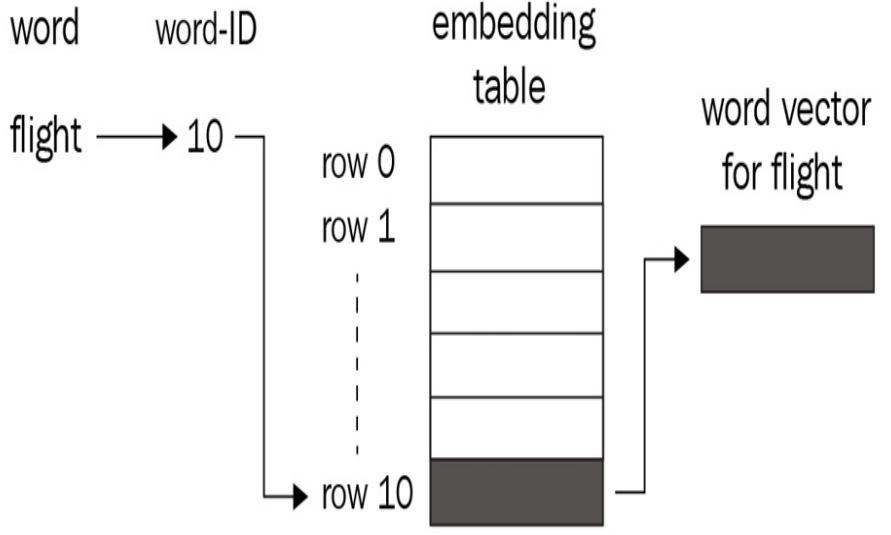

In [297]:
Image('images/word_keras.PNG')

Lembre-se de que na seção anterior começamos com uma lista de frases. Em seguida, fizemos o seguinte:
1. Quebramos cada frase em palavras e construímos um vocabulário com o Keras' **Tokenizer**.
2. O objeto **Tokenizer** continha um índice de palavras, que era um mapeamento **word->word-ID**.
3. Depois de obter o ID da palavra, podemos fazer uma pesquisa nas linhas da tabela de incorporação com este ID da palavra e obter um vetor de palavras.
4. Finalmente, alimentamos este vetor de palavras na rede neural.

Treinar uma rede neural não é fácil. Temos que dar vários passos para transformar frases em vetores. Após essas etapas preliminares, estamos prontos para projetar a arquitetura da rede neural e fazer o treinamento do modelo.
### Arquitetura de rede neural para classificação de texto

Nesta seção, projetaremos a arquitetura de rede neural para nosso classificador de texto. Seguiremos estas etapas para treinar o classificador:
1. Primeiro, pré-processaremos, tokenizaremos e preencheremos as frases de revisão. Após esta etapa, obteremos uma lista de sequências.
2. Forneceremos esta lista de sequências à rede neural através da camada de entrada.
3. Em seguida, vamos vetorizar cada palavra procurando seu ID de palavra na camada de incorporação. Neste ponto, uma frase é agora uma sequência de vetores de palavras, cada vetor de palavras correspondendo a uma palavra.
4. Depois disso, vamos alimentar a sequência de vetores de palavras para LSTM.
5. Finalmente, esmagaremos a saída do LSTM com uma camada *sigmóide* para obter probabilidades de classe.

Vamos começar lembrando o conjunto de dados novamente.
#### Conjunto de dados
Usaremos o mesmo conjunto de dados de revisões de alimentos finos da Amazon da seção Análise de sentimentos com spaCy. Já processamos o conjunto de dados com pandas nessa seção e o reduzimos a duas colunas e rótulos binários. Aqui está a aparência do conjunto de dados reviews_df:

In [298]:
reviews_df

,Text,Score
0,To be fair only one of my twins got gas from t...,0
1,Just recieved our first order of these (they d...,1
2,This is a fantastic Chai Masala. I am very pic...,1
3,Flavorful and has added nutrition! You use le...,1
4,I thought this soup tasted good. I liked the t...,0
...,...,...
3994,I just placed the order and it arrived today.....,1
3995,"My husband said this wasn't bad, but I found i...",0
3996,Our dogs don't always like the dry food we buy...,1
3997,This is a basic kit that may be of use to a be...,0


Vamos transformar um pouco nosso conjunto de dados. Extrairemos o texto da revisão e o rótulo da revisão de cada linha do conjunto de dados e os anexaremos às listas do Python:

In [299]:
train_examples = []
labels = []
for index, row in reviews_df.iterrows():
    text = row["Text"]
    rating = row["Score"]
    labels.append(rating)
    tokens = [token.text for token in nlp(text)]
    train_examples.append(tokens)

Observe que anexamos uma lista de palavras a **train_examples**, portanto, cada elemento dessa lista é uma lista de palavras. Em seguida, invocaremos o **Tokenizer** do Keras nesta lista de palavras para construir nosso vocabulário.
#### Preparação de dados e vocabulário
Já processamos nosso conjunto de dados, portanto, estamos prontos para tokenizar as frases do conjunto de dados e criar um vocabulário. Vamos passo a passo:
1. Primeiro, faremos as importações necessárias:

In [300]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

2. Estamos prontos para encaixar o objeto **Tokenizer** em nossa lista de palavras. Primeiro, ajustaremos o **Tokenizer**, depois converteremos as palavras em seus IDs chamando **text_to_sequences**:

In [301]:
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(train_examples)
sequences = tokenizer.texts_to_sequences(train_examples)

3. Em seguida, preencheremos as sequências curtas com um comprimento máximo de 50 (escolhemos esse número). Além disso, isso truncará comentários longos para um comprimento de 50 palavras:

In [302]:
MAX_LEN = 50
X = pad_sequences(sequences, MAX_LEN, padding="post")

4. Agora X é uma lista de sequências de 50 palavras. Por fim, converteremos esta lista de comentários e os rótulos em matrizes numpy:

In [303]:
X = np.array(X)
y = np.array(labels)

Aqui, observe que não fizemos nenhuma *lemmatization/stemming* ou remoção de palavras irrelevantes. Isso é completamente bom e, de fato, o caminho padrão a seguir com algoritmos de rede neural, porque palavras que são variações da mesma palavra raiz (**liked, liking, like**) obterão vetores de palavras semelhantes. Além disso, as palavras irrelevantes ocorrem com frequência em diferentes contextos, portanto, a rede neural pode deduzir que essas palavras são apenas palavras comuns do idioma e não têm muita importância.

#### A camada de entrada
O seguinte trecho de código define nossa camada de entrada:

In [305]:
from tensorflow.keras.layers import Input
sentence_input = Input(shape=(None,))

Não se confunda com **None** como a forma de entrada. Aqui, **None** significa que essa dimensão pode ser qualquer número escalar, portanto, usamos essa expressão quando queremos que Keras infira a forma de entrada.

#### A camada de incorporação
Definimos a camada de incorporação da seguinte forma:

In [306]:
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 100)(sentence_input)

Ao definir a camada de incorporação, a dimensão de entrada deve sempre ser o número de palavras no vocabulário (aqui, há um mais **1** porque os índices começam em **1**, não em **0**. O índice **0** é reservado para o valor de preenchimento).

Aqui, escolhemos a forma de saída como **100**, portanto, os vetores de palavras para as palavras do vocabulário serão de **100 dimensões**. Os números populares para dimensões de vetores de palavras são 50, 100 e 200, dependendo da complexidade da tarefa.
#### A camada LSTM
Vamos alimentar os vetores de palavras em nosso LSTM:

In [307]:
from tensorflow.keras.layers import LSTM
LSTM_layer = LSTM(units=256)(embedding)

Aqui, o parâmetro de **units** significa a dimensão do estado oculto. A forma de saída LSTM e a forma de estado oculto são as mesmas devido à arquitetura LSTM. Aqui, nossa camada LSTM produzirá um vetor de **256 dimensões**.
#### A camada de saída
Obtivemos um vetor de **256** dimensões da camada LSTM e queremos esmagá-lo em um vetor de **1** dimensão (os valores possíveis desse vetor são **0** e **1**, que são os rótulos da classe):

In [308]:
from tensorflow.keras.layers import Dense
output_dense = Dense(1, activation='sigmoid')(LSTM_layer)

Usamos a função *sigmoid* para esmagar os valores. A função sigmóide é uma função em forma de **S** e mapeia sua entrada para um intervalo [0-1]. Você pode descobrir mais sobre essa função em https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function.
#### Compilando o modelo
Após definir o modelo, precisamos compilá-lo com um otimizador, uma função de perda e uma métrica de avaliação:

In [309]:
from tensorflow.keras import Model
model = Model(inputs=[sentence_input],outputs=[output_dense])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

O **Adaptive Moment Estimation (ADAM)** é um otimizador popular em aprendizado profundo. Basicamente, adapta a rapidez com que a rede neural deve aprender. Você pode aprender sobre diferentes otimizadores nesta postagem do blog: https://ruder.io/optimizing-gradient-descent/. A entropia cruzada binária é uma perda usada em tarefas de classificação binária. Keras suporta diferentes funções de perda dependendo das tarefas. Você pode encontrar a lista no site da Keras em https://keras.io/api/losses/.

Uma **métrica** é uma função que usamos para avaliar o desempenho do nosso modelo. A métrica de precisão basicamente compara quantas vezes o rótulo previsto e o rótulo real correspondem. Uma lista de métricas suportadas pode ser encontrada na documentação do Keras (https://keras.io/api/metrics/).
#### Ajustando o modelo e avaliação do experimento
Por fim, ajustaremos o modelo em nossos dados:

In [310]:
model.fit(x=X,
          y=y,
          batch_size=64,
          epochs=5,
          validation_split=0.2)

Epoch 1/5
50/50 [==============================] - 4s 27ms/step - loss: 0.5470 - accuracy: 0.7671 - val_loss: 0.5337 - val_accuracy: 0.7563
Epoch 2/5
50/50 [==============================] - 1s 18ms/step - loss: 0.4255 - accuracy: 0.8071 - val_loss: 0.4986 - val_accuracy: 0.7875
Epoch 3/5
50/50 [==============================] - 1s 18ms/step - loss: 0.2043 - accuracy: 0.9219 - val_loss: 0.5516 - val_accuracy: 0.8012
Epoch 4/5
50/50 [==============================] - 1s 17ms/step - loss: 0.1189 - accuracy: 0.9628 - val_loss: 0.6702 - val_accuracy: 0.8025
Epoch 5/5
50/50 [==============================] - 1s 20ms/step - loss: 0.0851 - accuracy: 0.9753 - val_loss: 0.6438 - val_accuracy: 0.7800


Aqui, **x** é a lista de exemplos de treinamento e **y** é a lista de rótulos. Queremos fazer 5 passagens sobre os dados, portanto definimos o parâmetro **epochs** como **5**.

Repassamos os dados **5** vezes em tamanhos de lote de **64**. Normalmente, não ajustamos todo o conjunto de dados na memória de uma só vez (devido às limitações de memória), mas alimentamos o conjunto de dados para o classificador em pedaços menores, cada pedaço sendo chamado de **lote (batch)**. Aqui, o parâmetro **batch_size=64** significa que queremos alimentar um lote de 64 frases de treinamento de uma só vez.

Por fim, o parâmetro **validation_split** é usado para avaliar o experimento. Esse parâmetro simplesmente separará 20% dos dados como o conjunto de validação e validará o modelo nesse conjunto de validação. Nosso experimento resulta em precisão de 0,8012, o que é muito bom para um projeto de rede neural tão básico.

Nós encorajamos você a experimentar mais. Você pode experimentar mais o código colocando camadas de descarte em locais diferentes (como após a camada de incorporação ou após a camada LSTM). Outra maneira de experimentar é tentar valores diferentes para as dimensões de incorporação, como 50, 150 e 200, e observar a mudança na precisão. O mesmo se aplica à dimensão oculta da camada LSTM – você pode experimentar valores diferentes em vez de 256.

Terminamos o treinamento com **tf.keras** nesta seção e também concluímos o capítulo. Keras é uma API de aprendizado profundo excelente, eficiente e fácil de usar; a combinação spaCy e Keras é especialmente poderosa. A classificação de texto é uma tarefa essencial da NLP e descobrimos como fazer essa tarefa com o spaCy.